In [1]:
%reload_ext autoreload
%autoreload 2

The following example was taken from Reddy (2005) "An introduction to non-linear finite element analysis" Section 9.4.5.

Here we present numerical results obtained for a cantilevered rectangular plate of length a = 10 in, height b = 1 in, and thickness h = 0:1 in, and subjected to uniformly distributed in-plane load ty = -q0 psi, acting downward, along its length. The material of the plate has a modulus ofE = 1.2E7 psi and Poisson's ratio of nu = 0.3.

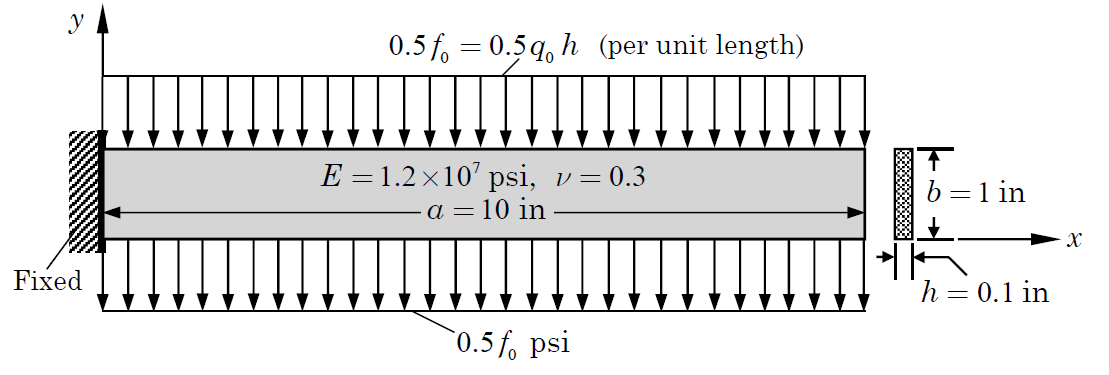

### General Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Mesh definition

In [3]:
from mesh_utils import UniformQuadMesh2D

lx = 10                 # Dimension along x-coord
ly = 1                  # Dimension along y-coord
nx = 5                  # Number of elements along x-coord
ny = 1                  # Number of elements along y-coord
element_type = 'Q8'     # Type of elements

cantilever_mesh = UniformQuadMesh2D(lx, ly, nx, ny, element_type=element_type)
cantilever_mesh.compute()


In [4]:
print(f'\nNodal coordinates:\n {cantilever_mesh.coordinates}')
print(f'\nElement connectivity:\n {cantilever_mesh.elements}')

print(f'\nNumber of nodes: {cantilever_mesh.nnod}')
print(f'Number of elements: {cantilever_mesh.nelem}')


Nodal coordinates:
 [[ 0.   0. ]
 [ 1.   0. ]
 [ 2.   0. ]
 [ 3.   0. ]
 [ 4.   0. ]
 [ 5.   0. ]
 [ 6.   0. ]
 [ 7.   0. ]
 [ 8.   0. ]
 [ 9.   0. ]
 [10.   0. ]
 [ 0.   0.5]
 [ 2.   0.5]
 [ 4.   0.5]
 [ 6.   0.5]
 [ 8.   0.5]
 [10.   0.5]
 [ 0.   1. ]
 [ 1.   1. ]
 [ 2.   1. ]
 [ 3.   1. ]
 [ 4.   1. ]
 [ 5.   1. ]
 [ 6.   1. ]
 [ 7.   1. ]
 [ 8.   1. ]
 [ 9.   1. ]
 [10.   1. ]]

Element connectivity:
 {'quad': [array([20, 18,  1,  3, 19, 12,  2, 13]), array([22, 20,  3,  5, 21, 13,  4, 14]), array([24, 22,  5,  7, 23, 14,  6, 15]), array([26, 24,  7,  9, 25, 15,  8, 16]), array([28, 26,  9, 11, 27, 16, 10, 17])]}

Number of nodes: 28
Number of elements: 5


In [5]:
cantilever_mesh.node_groups

{'all': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 'bottom': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'top': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 'left': [1, 12, 18],
 'right': [11, 17, 28]}

In [6]:
cantilever_mesh.element_groups

{'all': [1, 2, 3, 4, 5],
 'bottom': [1, 2, 3, 4, 5],
 'top': [1, 2, 3, 4, 5],
 'left': [1],
 'right': [5]}

### Dirichlet boundary conditions

In [7]:
from feinn_solver import BoundaryCondition

cantilever_bc = {
                'left': [BoundaryCondition(dof=1, value=0.0),
                        BoundaryCondition(dof=2, value=0.0)]
                }

### Define material

In [8]:
from matmodels import LinearElasticPlaneStress

dummy_mat = LinearElasticPlaneStress(EMOD = 1.2*1e7, nu = 0.20)

cantilever_matfld = {'all': dummy_mat}

### von Neumman boundary conditions

In [9]:
from feinn_solver import EdgeLoad

cantilever_edge_loads = {
                        'top': EdgeLoad(side = 1, ftangential = 0.0, fnormal = -450, reference = "global"),
                        'bottom': EdgeLoad(side = 3, ftangential = 0.0, fnormal = -450, reference = "global"),
                        }

### Model

In [10]:
from feinn_solver import NFEA

cantilever_fem = NFEA(mesh = cantilever_mesh, 
                      bcs = cantilever_bc, 
                      matfld = cantilever_matfld,
                      edge_loads = cantilever_edge_loads,
                      verbose = True
                      )

[matfld] Assigned: ['all']
[matfld] All 5 elements have assigned material
[edge_load] Applied 2 edge load groups
[BC] Processed 2 Dirichlet condition(s) → 6 total constraint(s)
[BC] Applied Dirichlet BCs → 6 fixed DOFs


In [11]:
# assign thickness to elements
for elem_i in cantilever_fem.elements:
    elem_i.thickness = 0.1

In [12]:
cantilever_fem.Fext_total

tensor([   0.0000, -150.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -300.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -150.0000,    0.0000,    0.0000,
           0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
           0.0000,    0.0000,    0.0000,    0.0000,    0.0000, -150.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -300.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -150.0000])

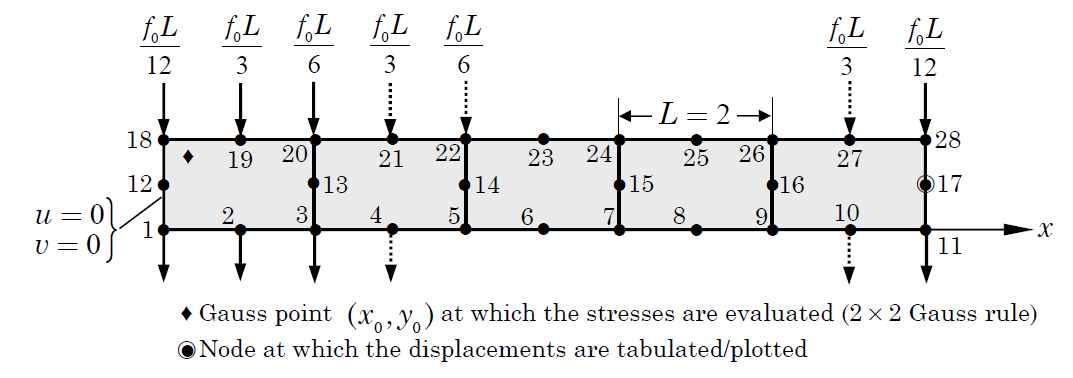

In [13]:
cantilever_fem.formulation = 'infinitesimal'
cantilever_fem.run_complete(nsteps=1)

[Load] Set load factor = 1.0000.
Iter   1 | du error: 1.00e+00  Res error: 1.88e-11  Energetic error: -5.95e-07
Iter   2 | du error: 1.50e-11  Res error: 4.25e-12  Energetic error: -1.35e-23
Converged in 2 iterations


In [14]:
cantilever_fem.udisp

tensor([ 0.0000e+00,  0.0000e+00, -1.9294e-01, -2.1783e-01, -3.5951e-01,
        -7.9336e-01, -4.8396e-01, -1.6522e+00, -5.8343e-01, -2.7332e+00,
        -6.4867e-01, -3.9776e+00, -6.9716e-01, -5.3338e+00, -7.2346e-01,
        -6.7620e+00, -7.3946e-01, -8.2306e+00, -7.4423e-01, -9.7174e+00,
        -7.4562e-01, -1.1209e+01,  0.0000e+00,  0.0000e+00,  1.6408e-12,
        -7.8318e-01,  1.1584e-12, -2.7299e+00,  1.2072e-12, -5.3318e+00,
         1.1863e-12, -8.2301e+00,  1.1918e-12, -1.1209e+01,  0.0000e+00,
         0.0000e+00,  1.9294e-01, -2.1783e-01,  3.5951e-01, -7.9336e-01,
         4.8396e-01, -1.6522e+00,  5.8343e-01, -2.7332e+00,  6.4867e-01,
        -3.9776e+00,  6.9716e-01, -5.3338e+00,  7.2346e-01, -6.7620e+00,
         7.3946e-01, -8.2306e+00,  7.4423e-01, -9.7174e+00,  7.4562e-01,
        -1.1209e+01])

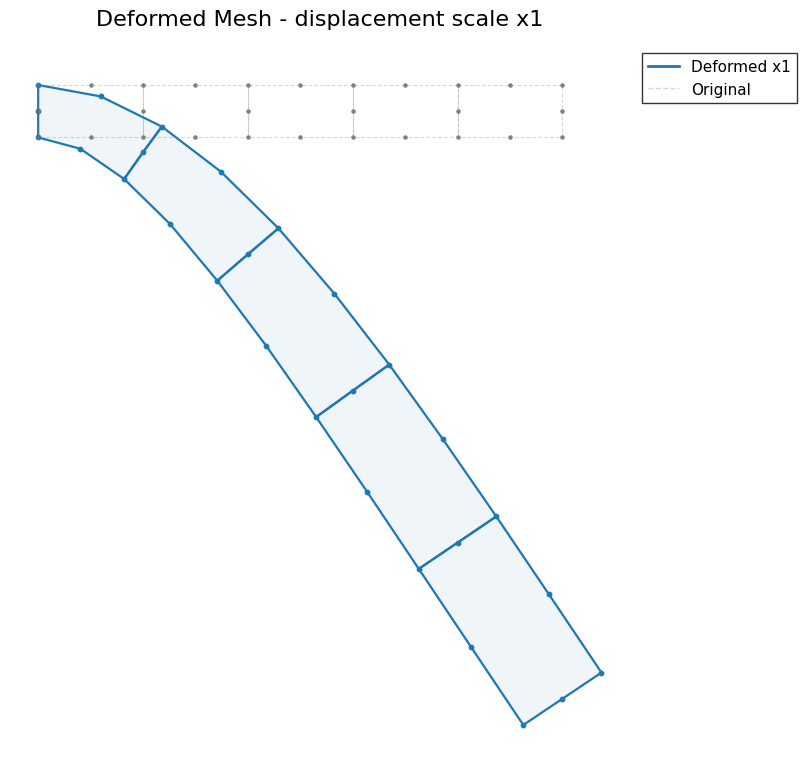

In [15]:
cantilever_fem.plot_deformed_mesh(scale=1)

In [16]:
from feinn_solver import FEINN

feinn_solver = FEINN(
    mesh=cantilever_mesh,
    bcs=cantilever_bc,
    matfld=cantilever_matfld,
    edge_loads=cantilever_edge_loads,
    verbose=False,
    bc_weight=1e6
    )


In [18]:
from types import SimpleNamespace

cfg = SimpleNamespace(**{})

cfg.epochs = 5000
cfg.learning_rate = 1e-2
cfg.lr_min = 1e-3

In [19]:
import torch

optimizer = torch.optim.Adam(
    feinn_solver.nnet.parameters(),
    lr = cfg.learning_rate,
    weight_decay = 0,
  )

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max = cfg.epochs,
    eta_min = cfg.lr_min
  )

# Entrenar
feinn_solver.train(epochs=cfg.epochs, 
                   optimizer=optimizer, 
                   scheduler=scheduler, 
                   verbose=True)



Epoch 1/5000
Total Loss: 3.209e+12
  Domain: 3.209e+12
  BC:     1.592e+04

Epoch 500/5000
Total Loss: 1.411e+07
  Domain: 1.411e+07
  BC:     2.422e+00

Epoch 1000/5000
Total Loss: 2.807e+06
  Domain: 2.807e+06
  BC:     1.961e+00

Epoch 1500/5000
Total Loss: 1.600e+06
  Domain: 1.600e+06
  BC:     1.964e+00


KeyboardInterrupt: 

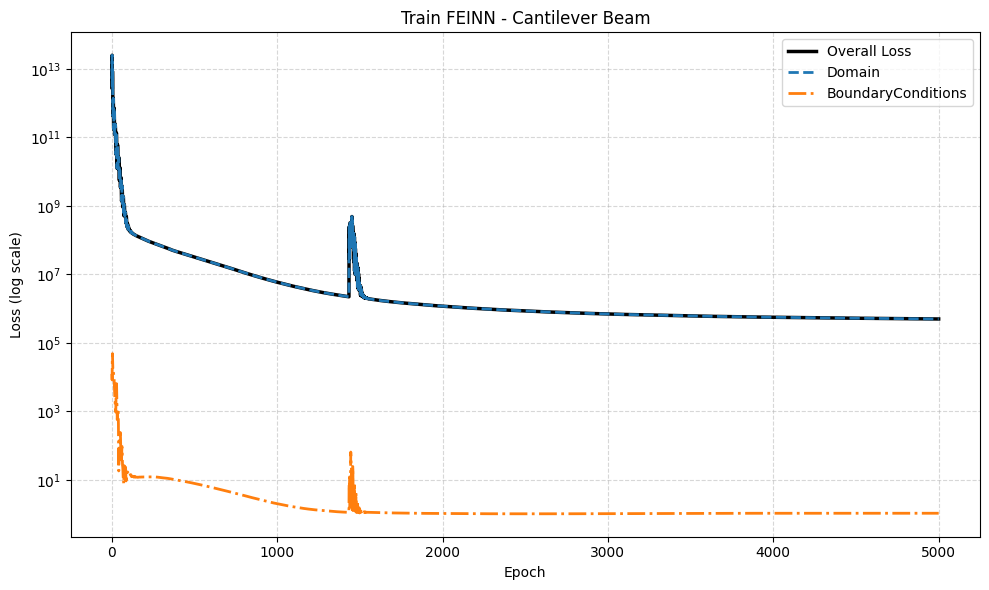

In [ ]:

feinn_solver.plot_history(title="Train FEINN - Cantilever Beam")

In [ ]:
feinn_solver.udisp

tensor([ 7.6166e-04, -9.0864e-04, -3.9024e-04,  2.9822e-04, -8.1168e-04,
         9.0252e-04, -2.4591e-04,  1.0214e-03, -8.5666e-04,  1.2080e-03,
        -3.2621e-03, -2.2920e-03, -5.1281e-03, -1.0503e-02, -4.8646e-03,
        -2.0584e-02, -3.8722e-03, -2.9026e-02, -3.0629e-03, -3.5325e-02,
        -2.6275e-03, -4.0253e-02, -1.0115e-03,  1.7560e-03, -2.7444e-04,
         1.8964e-04, -3.8482e-04,  1.5207e-03, -2.9040e-04, -1.0500e-02,
        -2.4696e-04, -2.9083e-02, -2.1679e-04, -4.0355e-02,  2.5096e-04,
        -8.4742e-04,  2.2719e-04, -1.2539e-05, -5.1989e-04,  8.9531e-04,
        -7.1045e-04,  1.0594e-03,  2.8110e-04,  1.2853e-03,  2.6536e-03,
        -2.3257e-03,  4.5056e-03, -1.0499e-02,  4.2895e-03, -2.0585e-02,
         3.3690e-03, -2.9070e-02,  2.6308e-03, -3.5294e-02,  2.2774e-03,
        -4.0420e-02])

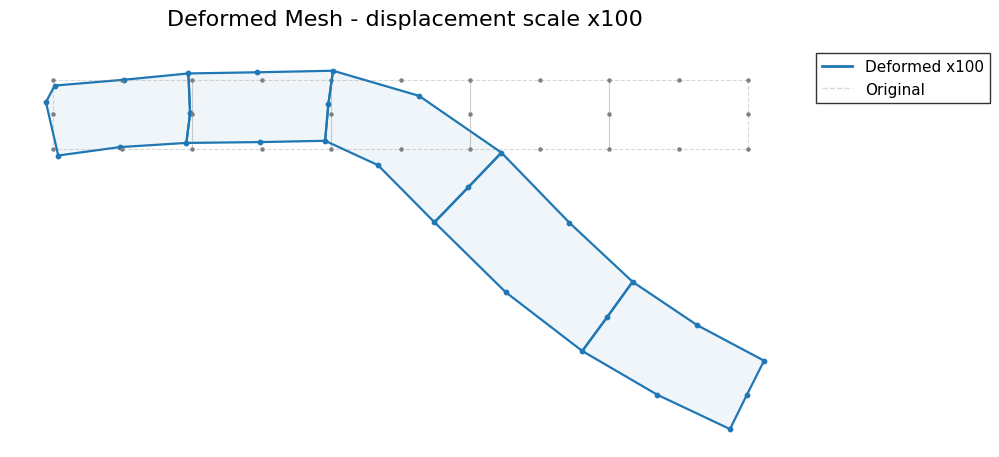

In [ ]:
feinn_solver.plot_deformed_mesh(scale=100)

In [ ]:
Fint = feinn_solver._assemble_internal_forces(feinn_solver.udisp)

In [ ]:
Fint

tensor([ 1.0083e+04, -4.6117e+04,  8.2114e+01, -4.3640e+02, -5.9996e+02,
        -2.6412e+02,  2.6966e+02, -1.2548e+03,  8.5298e+02,  6.7418e+02,
        -1.5122e+02,  1.3367e+03, -9.0124e+02,  9.9265e+01, -1.8159e+02,
        -1.4056e+03,  3.7023e+02, -2.8103e+02,  2.2097e+02, -4.0612e+02,
         1.9557e+02,  7.3444e+02, -2.3790e+04,  1.0007e+05, -8.2999e+01,
         4.2394e+02,  9.4719e+01,  1.3999e+03,  1.1751e+01,  5.0420e+02,
         4.7759e+01, -2.1901e+02, -5.1791e+01,  5.2369e+02,  1.3547e+04,
        -5.4248e+04, -2.7625e+01, -4.7319e+02,  4.6313e+02,  5.1545e+02,
        -4.5722e+02, -1.9963e+03, -7.3823e+02,  1.5368e+03,  1.1521e+02,
         1.2539e+03,  1.0038e+03,  2.3459e+02,  5.8747e+01, -1.4184e+03,
        -3.7414e+02, -6.2478e+02, -1.0803e+02, -3.4200e+01,  4.8472e+01,
        -1.3192e+02])

In [ ]:
feinn_solver.Fext

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])